#### Install  Required Libraries

In [5]:
!pip install -r requirements.txt


  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached xgboost-3.0.1-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp312-cp312-win_amd64.whl.metadata (106 kB)
  Using cached kiwis

#### Load and explore data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    'status' ,'duration' , 'credit_history' , 'purpose','amount','savings','employment' ,'installment_rate' ,
    'personal_status','other_debtors' , 'residence' , 'property','age','other_plans', 'housing' ,'existing_credits',
    'job' , 'dependents' , 'telephone' , 'foreign','target'
]
data = pd.read_csv(url , sep =' ' , names = columns)
data['target'] = data['target'].replace({1: 0, 2: 1})
print(data.head())

  status  duration credit_history purpose  amount savings employment  \
0    A11         6            A34     A43    1169     A65        A75   
1    A12        48            A32     A43    5951     A61        A73   
2    A14        12            A34     A46    2096     A61        A74   
3    A11        42            A32     A42    7882     A61        A74   
4    A11        24            A33     A40    4870     A61        A73   

   installment_rate personal_status other_debtors  ...  property age  \
0                 4             A93          A101  ...      A121  67   
1                 2             A92          A101  ...      A121  22   
2                 2             A93          A101  ...      A121  49   
3                 2             A93          A103  ...      A122  45   
4                 3             A93          A101  ...      A124  53   

   other_plans housing existing_credits   job dependents  telephone foreign  \
0         A143    A152                2  A173          

#### Data Preprocessing

In [34]:
# Select numerical and categorical columns
numerical_features = ['age' , 'amount' , 'duration','installment_rate' , 'existing_credits']
categorical_features = ['credit_history' , 'purpose' , 'savings' , 'employment' , 'housing' , 'personal_status' ]

# Create a ColumnTransformer for preprocessing
preprocessor  = ColumnTransformer(
    transformers=[
        ('num' , StandardScaler() , numerical_features),
        ('cat' , OneHotEncoder(drop='first') , categorical_features)
    ])
# Split the data into features (X) and target (y)
X = data.drop('target' , axis=1)
y = data['target']

# Split into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Apply preprocessing 
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Train Machine Learning Models

In [19]:
## Initializing the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier()
}

## Train and evaluate each model
for name , model in models.items():
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name}  Performance:")
    print(f"Accuracy: , {accuracy_score(y_test , y_pred):.2f}")
    print("Confusion Matrix")
    print(confusion_matrix(y_test , y_pred))
    print("Classification Report")
    print(classification_report(y_test , y_pred))
    print("--------------------------------------------------")


Logistic Regression  Performance:
Accuracy: , 0.76
Confusion Matrix
[[130  11]
 [ 37  22]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       141
           1       0.67      0.37      0.48        59

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.66       200
weighted avg       0.75      0.76      0.74       200

--------------------------------------------------

Random Forest  Performance:
Accuracy: , 0.71
Confusion Matrix
[[127  14]
 [ 43  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       141
           1       0.53      0.27      0.36        59

    accuracy                           0.71       200
   macro avg       0.64      0.59      0.59       200
weighted avg       0.68      0.71      0.68       200

--------------------------------------------------

XGBoost  Performance:

### Feature Importance

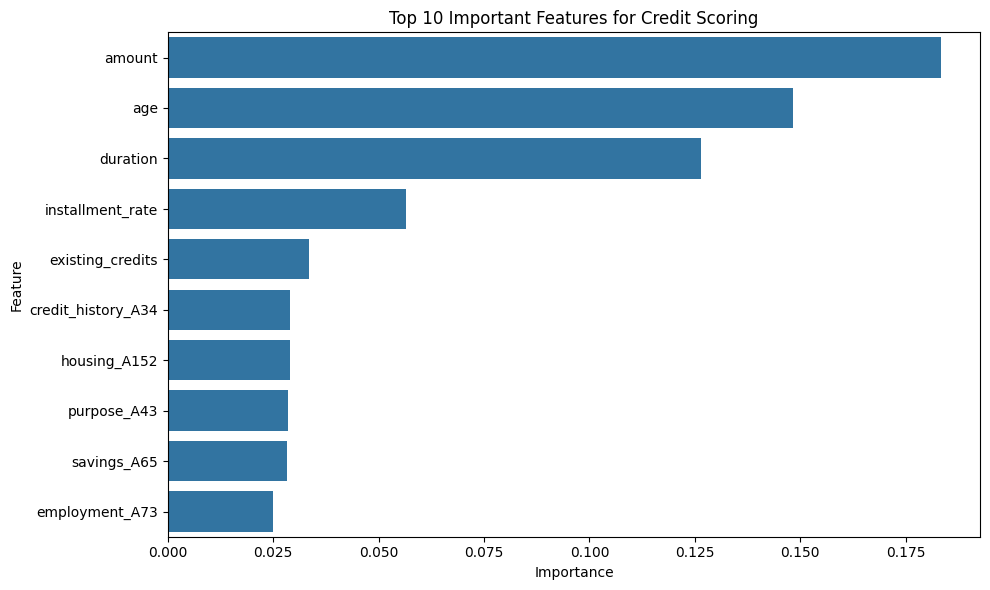

In [35]:
# Get feature importances from Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train , y_train)

# Get feature names
numeric_features = numerical_features
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(categorical_features)

#Create a DataFrame 
feature_importance = pd.DataFrame({
    'Feature' : all_features,
    'Importance' : rf_model.feature_importances_
}).sort_values('Importance' , ascending=False)

plt.figure(figsize=(10 , 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features for Credit Scoring")
plt.tight_layout()
plt.show()


## Make prediction on new data


In [40]:
# 1. Define the original column names (before one-hot encoding)
original_columns = ['status', 'duration', 'credit_history', 'purpose', 'amount',
                   'savings', 'employment', 'installment_rate', 'personal_status',
                   'other_debtors', 'property', 'age', 'other_plans',
                   'housing', 'existing_credits', 'job', 'telephone', 'foreign']

# 2. Create new applicant data with ORIGINAL column names
new_applicant1= {
    'status': 'A12',
    'duration': 12,
    'credit_history': 'A32',
    'purpose': 'A43',
    'amount': 2000,
    'savings': 'A62',
    'employment': 'A73',
    'installment_rate': 4,
    'personal_status': 'A93',
    'other_debtors': 'A102',
    'property': 'A122',
    'age': 30,
    'other_plans': 'A143',
    'housing': 'A152',
    'existing_credits': 2,
    'job': 'A172',
    'telephone': 'A191',
    'foreign': 'A201'
}


# 3. Convert to DataFrame with original columns
new_data = pd.DataFrame([new_applicant1])[original_columns]

# 4. Transform using the preprocessor
try:
    processed_data = preprocessor.transform(new_data)
    
    # 5. Make prediction
    prediction = models["XGBoost"].predict(processed_data)
    prediction_proba = models["XGBoost"].predict_proba(processed_data)[0,1]
    
    print("Prediction of new_applicant1:", "High Risk (Bad)" if prediction[0] == 1 else "Low Risk (Good)")
    print(f"Probability of default: {prediction_proba:.2%}")
    
except Exception as e:
    print(f"Error during prediction: {str(e)}")
    print("Make sure you're providing all original features with correct names and values")
    
    
# 1. Define the original column names (before one-hot encoding)
original_columns = ['status', 'duration', 'credit_history', 'purpose', 'amount',
                   'savings', 'employment', 'installment_rate', 'personal_status',
                   'other_debtors', 'property', 'age', 'other_plans',
                   'housing', 'existing_credits', 'job', 'telephone', 'foreign']

# 2. Create new applicant data with ORIGINAL column names
new_applicant2= {
    'status': 'A12',
    'duration': 14,
    'credit_history': 'A32',
    'purpose': 'A43',
    'amount': 20000,
    'savings': 'A62',
    'employment': 'A73',
    'installment_rate': 5,
    'personal_status': 'A93',
    'other_debtors': 'A102',
    'property': 'A122',
    'age': 30,
    'other_plans': 'A143',
    'housing': 'A152',
    'existing_credits': 3,
    'job': 'A172',
    'telephone': 'A191',
    'foreign': 'A201'
}

# 3. Convert to DataFrame with original columns
new_data = pd.DataFrame([new_applicant2])[original_columns]

# 4. Transform using the preprocessor
try:
    processed_data = preprocessor.transform(new_data)
    
    # 5. Make prediction
    prediction = models["XGBoost"].predict(processed_data)
    prediction_proba = models["XGBoost"].predict_proba(processed_data)[0,1]
    
    print("Prediction of new_applicant2:", "High Risk (Bad)" if prediction[0] == 1 else "Low Risk (Good)")
    print(f"Probability of default: {prediction_proba:.2%}")
    
except Exception as e:
    print(f"Error during prediction: {str(e)}")
    print("Make sure you're providing all original features with correct names and values")    

Prediction of new_applicant1: Low Risk (Good)
Probability of default: 3.38%
Prediction of new_applicant2: High Risk (Bad)
Probability of default: 98.33%


## Prediction on different data to check model working

In [44]:
# 1. Define the original column names (before one-hot encoding)
original_columns = ['status', 'duration', 'credit_history', 'purpose', 'amount',
                   'savings', 'employment', 'installment_rate', 'personal_status',
                   'other_debtors', 'property', 'age', 'other_plans',
                   'housing', 'existing_credits', 'job', 'telephone', 'foreign']

# 2. Create new applicant data with ORIGINAL column names
Jiya = {
    'status': 'A12',
    'duration': 12,
    'credit_history': 'A32',
    'purpose': 'A43',
    'amount': 1000,
    'savings': 'A62',
    'employment': 'A73',
    'installment_rate': 4,
    'personal_status': 'A93',
    'other_debtors': 'A102',
    'property': 'A122',
    'age': 30,
    'other_plans': 'A143',
    'housing': 'A152',
    'existing_credits': 2,
    'job': 'A172',
    'telephone': 'A191',
    'foreign': 'A201'
}


# 3. Convert to DataFrame with original columns
new_data = pd.DataFrame([Jiya])[original_columns]

# 4. Transform using the preprocessor
try:
    processed_data = preprocessor.transform(new_data)
    
    # 5. Make prediction
    prediction = models["XGBoost"].predict(processed_data)
    prediction_proba = models["XGBoost"].predict_proba(processed_data)[0,1]
    
    print("Prediction of Jiya:", "High Risk (Bad)" if prediction[0] == 1 else "Low Risk (Good)")
    print(f"Probability of default: {prediction_proba:.2%}")
    
except Exception as e:
    print(f"Error during prediction: {str(e)}")
    print("Make sure you're providing all original features with correct names and values")
    
    
# 1. Define the original column names (before one-hot encoding)
original_columns = ['status', 'duration', 'credit_history', 'purpose', 'amount',
                   'savings', 'employment', 'installment_rate', 'personal_status',
                   'other_debtors', 'property', 'age', 'other_plans',
                   'housing', 'existing_credits', 'job', 'telephone', 'foreign']

# 2. Create new applicant data with ORIGINAL column names
Javesh= {
    'status': 'A12',
    'duration': 10,
    'credit_history': 'A32',
    'purpose': 'A43',
    'amount': 100000,
    'savings': 'A62',
    'employment': 'A73',
    'installment_rate': 5,
    'personal_status': 'A93',
    'other_debtors': 'A102',
    'property': 'A122',
    'age': 25,
    'other_plans': 'A143',
    'housing': 'A152',
    'existing_credits': 4,
    'job': 'A172',
    'telephone': 'A191',
    'foreign': 'A201'
}

# 3. Convert to DataFrame with original columns
new_data = pd.DataFrame([Javesh])[original_columns]

# 4. Transform using the preprocessor
try:
    processed_data = preprocessor.transform(new_data)
    
    # 5. Make prediction
    prediction = models["XGBoost"].predict(processed_data)
    prediction_proba = models["XGBoost"].predict_proba(processed_data)[0,1]
    
    print("Prediction of Javesh:", "High Risk (Bad)" if prediction[0] == 1 else "Low Risk (Good)")
    print(f"Probability of default: {prediction_proba:.2%}")
    
except Exception as e:
    print(f"Error during prediction: {str(e)}")
    print("Make sure you're providing all original features with correct names and values")    

Prediction of Jiya: Low Risk (Good)
Probability of default: 0.86%
Prediction of Javesh: High Risk (Bad)
Probability of default: 97.98%
